In [451]:
# Pymaceuticals Pharma Drug Analysis 
# Done by: Aruna Amaresan 
# Completion Date: Dec 18th 2017 
# Assumptions: 
# Pymaceuticals - Clinical Drug Analysis - 
# We are looking at the mean (average) of values when summarizing Tumer Volume Chnage over 'n' mice say using Drug 'C' 
# At each Time period of T=0. Then T = 5, 10 and so on. The same is done Metastatis Spread. We espect nit many outliers 
# present in the data set shared. hence taken mean. 
# For Survival Rate, we have taken the mouse count for each drug in ech time period. 
# 
# Input:   The two raw CSV files are expcetdd to be kept at the raw_data folder under this current directory. 
#          Their names are hard coded here. We can change it to be input of needed 
# Process: Data has been read from CS and first some clean-up and preparation of data done to be able to come up with 
#          results needed for the plots. 
# Output:  The following plots have been created. 
#          a) Tumor Volume Change over Time for all 4 drugs (compared) - Scatter Plot
#          b) Metastatis Spread of the cancer over time during the Drug treatment  - Scatter Plot 
#          c) Survival Rate over time By Drug - Scatter Plot 
#          d) % Tumor Volume Change By Drug - Bar Plot 
#          e) PDF file sharing an analysis of the three observable trends and next steps have been submitted 
#             also in this folder. Also shared a marked down Readme.MD file           

# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
import seaborn as sns

In [452]:
# Load the  CSV file 
# Read CSV
#clinical_pd = pd.read_csv("raw_data\clinicaltrail_data.csv")
#mouse_drug_pd = pd.read_csv("raw_data\mouse_drug_data.csv")


# load the clinical CSV files 
clinicalCSV = os.path.join('raw_data', 'clinicaltrial_data.csv')

clinical_pd = pd.read_csv(clinicalCSV, encoding="iso-8859-1", low_memory=False)

clinical_pd.head()


#cleanse of any empty rows in students

clinical = clinical_pd.dropna(how="any")
clinical.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [453]:
# Load the mouse ID to drug mapping CSV file 
mouse_drugCSV = os.path.join('raw_data', 'mouse_drug_data.csv')

mouse_drug_pd = pd.read_csv(mouse_drugCSV, encoding="iso-8859-1", low_memory=False)

#mouse_drug_pd.head()

#Cleanse any empty rows. 

mouse_drug = mouse_drug_pd.dropna(how="any")
mouse_drug.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [454]:
# Merge the 2 data using MouseID   
clinical_mouse_drug_data = pd.merge(clinical, mouse_drug, on="Mouse ID")

count = len(clinical_mouse_drug_data)

#print("No. of Inner join records: %s" %(str(count)))

#clinical_mouse_drug_data.head(1000)

In [455]:
# Take only columns we need from mouse_drug for lot on Tumer volume over Time plot 
#Mouse ID	Timepoint	Tumor Volume (mm3)
reduced_mouse_drug = clinical_mouse_drug_data.loc[:, ['Drug','Timepoint','Tumor Volume (mm3)']]

reduced_mouse_drug.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,45.651331
2,Capomulin,10,43.270852
3,Capomulin,15,43.784893
4,Capomulin,20,42.731552


In [456]:
# Group By Schools and Find Average reading score

clincial_ByDrug = pd.DataFrame(reduced_mouse_drug.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean())

#clincial_ByDrug.head(100)

clincial_ByDrug_Updated = clincial_ByDrug.reset_index()

clincial_ByDrug.head(100)
#clincial_ForCapomulin.head()

y_max_value = clincial_ByDrug["Tumor Volume (mm3)"].max()

y_min_value = clincial_ByDrug["Tumor Volume (mm3)"].min()

#print ("Max: %s Min: %s" % (y_max_value, y_min_value))

In [457]:
# Group By Drugs and Append to the cleaned up list
clinical_ForCapmoulin = reduced_mouse_drug[reduced_mouse_drug['Drug'] == "Capomulin"].groupby('Timepoint')['Tumor Volume (mm3)'].mean()


Capmoulin_pd = pd.DataFrame (clinical_ForCapmoulin)

Capmoulin_pd.reset_index(inplace = True)

Capmoulin_pd.rename(columns={"Tumor Volume (mm3)":"Capomulin"}, inplace = True)

# Data set needed for Part 4 bar plot  for Drug 1 - Caclulate & store while traversing the Tumor Volume Data 
# Create a holder for storing Tumor Volume Change over time for each drug - This would be used later to show 
# % Tumor size change over time

columnsHeaders = ['Drug Name', 'Original Volume', 'Volume Change', '% Tumor Volume Change']
Tumor_Percent_Change_ByDrug = pd.DataFrame(columns = columnsHeaders)

# Calculate the Original Size, Volume Change 
OriginalVolSize = 0
VolumeChange = 0

for index, row in Capmoulin_pd.iterrows():
    if (row["Timepoint"] == 0):
        OriginalVolSize = row["Capomulin"]
    
    if (row["Timepoint"] == 45):
        VolumeChange = row["Capomulin"] - OriginalVolSize
        break;

#print ("Original Vol Size: %s Volume Change: %s" %(str(OriginalVolSize), str(VolumeChange)))

#Add the values found into the appropriate columns - Then calculate & store % Volume Change 
index = 0
Tumor_Percent_Change_ByDrug.set_value(index, "Drug Name", "Capomulin")
Tumor_Percent_Change_ByDrug.set_value(index + 1, "Drug Name", "Infubinol")
Tumor_Percent_Change_ByDrug.set_value(index + 2, "Drug Name", "Ketapril")
Tumor_Percent_Change_ByDrug.set_value(index + 3, "Drug Name", "Placebo")

Tumor_Percent_Change_ByDrug.set_value(index, "Original Volume", OriginalVolSize)
Tumor_Percent_Change_ByDrug.set_value(index, "Volume Change", VolumeChange)
Tumor_Percent_Change_ByDrug.set_value(index, "% Tumor Volume Change", (VolumeChange / OriginalVolSize) * 100)

#print (Tumor_Percent_Change_ByDrug.head())

#Infubinol_pd["Infubinol Survival Rate %"] = Infubinol_pd["Infubinol"] / Total_MouseCount * 100

Capmoulin_pd.head(20)



,Timepoint,Capomulin
0,0,45.000000
1,5,44.266086
2,10,43.084291
3,15,42.064317
4,20,40.716325
5,25,39.939528
6,30,38.769339
7,35,37.816839
8,40,36.958001
9,45,36.236114


In [458]:
# Group By Drugs and Append to the cleaned up list
clinical_ForInfubinol = reduced_mouse_drug[reduced_mouse_drug['Drug'] == "Infubinol"].groupby('Timepoint')['Tumor Volume (mm3)'].mean()


Infubinol_pd = pd.DataFrame (clinical_ForInfubinol)

Infubinol_pd.reset_index(inplace = True)
Infubinol_pd.head()

Infubinol_pd.rename(columns={"Tumor Volume (mm3)":"Infubinol"}, inplace=True)

# Data set needed for Part 4 bar plot for Drug 2 - Caclulate & store while traversing the Tumor Volume Data 

# Calculate the Original Size, Volume Change for Drug 2
OriginalVolSize = 0
VolumeChange = 0

for index, row in Infubinol_pd.iterrows():
    if (row["Timepoint"] == 0):
        OriginalVolSize = row["Infubinol"]
    
    if (row["Timepoint"] == 45):
        VolumeChange = row["Infubinol"] - OriginalVolSize
        break;

#print ("Original Vol Size: %s Volume Change: %s" %(str(OriginalVolSize), str(VolumeChange)))

#Add the values found into the appropriate columns - Then calculate & store % Volume Change 

for index, row in Tumor_Percent_Change_ByDrug.iterrows():
    if (row["Drug Name"] == "Infubinol"):
        Tumor_Percent_Change_ByDrug.set_value(index, "Original Volume", OriginalVolSize)
        Tumor_Percent_Change_ByDrug.set_value(index, "Volume Change", VolumeChange)
        Tumor_Percent_Change_ByDrug.set_value(index, "% Tumor Volume Change", (VolumeChange / OriginalVolSize) * 100)
        break;

#print (Tumor_Percent_Change_ByDrug.head())

#Infubinol_pd.head()

#clinical_drug_tvol_data = Capmoulin_pd.rename(columns={"Tumor Volume (mm3)":"Capomulin"})

In [459]:
# Group By Drugs and Append to the cleaned up list
clinical_ForKetapril = reduced_mouse_drug[reduced_mouse_drug['Drug'] == "Ketapril"].groupby('Timepoint')['Tumor Volume (mm3)'].mean()


Ketapril_pd = pd.DataFrame (clinical_ForKetapril)

Ketapril_pd.reset_index(inplace = True)
Ketapril_pd.head()

Ketapril_pd.rename(columns={"Tumor Volume (mm3)":"Ketapril"}, inplace=True)

# Data set needed for Part 4 bar plot for Drug 3 - Caclulate & store while traversing the Tumor Volume Data 

# Calculate the Original Size, Volume Change for Drug 3
OriginalVolSize = 0
VolumeChange = 0

for index, row in Ketapril_pd.iterrows():
    if (row["Timepoint"] == 0):
        OriginalVolSize = row["Ketapril"]
    
    if (row["Timepoint"] == 45):
        VolumeChange = row["Ketapril"] - OriginalVolSize
        break;

#print ("Original Vol Size: %s Volume Change: %s" %(str(OriginalVolSize), str(VolumeChange)))

#Add the values found into the appropriate columns - Then calculate & store % Volume Change 

for index, row in Tumor_Percent_Change_ByDrug.iterrows():
    if (row["Drug Name"] == "Ketapril"):
        Tumor_Percent_Change_ByDrug.set_value(index, "Original Volume", OriginalVolSize)
        Tumor_Percent_Change_ByDrug.set_value(index, "Volume Change", VolumeChange)
        Tumor_Percent_Change_ByDrug.set_value(index, "% Tumor Volume Change", (VolumeChange / OriginalVolSize) * 100)
        break;

#print (Tumor_Percent_Change_ByDrug.head())

#Ketapril_pd.head()



In [460]:
# Group By Drugs and Append to the cleaned up list
clinical_ForPlacebo = reduced_mouse_drug[reduced_mouse_drug['Drug'] == "Placebo"].groupby('Timepoint')['Tumor Volume (mm3)'].mean()


Placebo_pd = pd.DataFrame (clinical_ForPlacebo)

Placebo_pd.reset_index(inplace = True)
Placebo_pd.head()

Placebo_pd.rename(columns={"Tumor Volume (mm3)":"Placebo"}, inplace=True)

# Data set needed for Part 4 bar plot for Drug 4 - Caclulate & store while traversing the Tumor Volume Data 

# Calculate the Original Size, Volume Change for Drug 4
OriginalVolSize = 0
VolumeChange = 0

for index, row in Placebo_pd.iterrows():
    if (row["Timepoint"] == 0):
        OriginalVolSize = row["Placebo"]
    
    if (row["Timepoint"] == 45):
        VolumeChange = row["Placebo"] - OriginalVolSize 
        break;

#print ("Original Vol Size: %s Volume Change: %s" %(str(OriginalVolSize), str(VolumeChange)))

#Add the values found into the appropriate columns - Then calculate & store % Volume Change 

for index, row in Tumor_Percent_Change_ByDrug.iterrows():
    if (row["Drug Name"] == "Placebo"):
        Tumor_Percent_Change_ByDrug.set_value(index, "Original Volume", OriginalVolSize)
        Tumor_Percent_Change_ByDrug.set_value(index, "Volume Change", VolumeChange)
        Tumor_Percent_Change_ByDrug.set_value(index, "% Tumor Volume Change", (VolumeChange / OriginalVolSize) * 100)
        break;

#print (Tumor_Percent_Change_ByDrug.head())


#Placebo_pd.head()



In [461]:
#Merge the Different Drug Dataframes by their Timepoints and Gte final dataframe needed to make a scatter plot of 
# Tumor volume change over time 

merged_ForCapInf = pd.merge(Capmoulin_pd , Infubinol_pd, on="Timepoint")

#merged_ForCapInf.head()

merged_ForKetPla = pd.merge(Ketapril_pd , Placebo_pd, on="Timepoint")

#merged_ForKetPla.head()

TumorVol_OverTime = pd.merge(merged_ForCapInf, merged_ForKetPla, on="Timepoint")

#TumorVol_OverTime.head(20)


In [462]:
# Try with sns 

#sns.set_style("whitegrid")

#g = sns.lmplot(x='Timepoint', y='Capomulin',data=TumorVol_OverTime)

#sns.lmplot(x='Timepoint', , data=TumorVol_OverTime)
#g.lmplot (x ='Timepoint')
#sns.lmplot(x='Timepoint', y='Infubinol', data=TumorVol_OverTime)


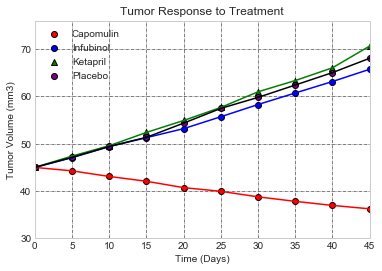

In [463]:
# Tell matplotlib to create a scatter plot based upon the above data
Capmoullin = plt.scatter(TumorVol_OverTime["Timepoint"], TumorVol_OverTime["Capomulin"], marker="o", facecolors="red", edgecolors="black", label="Capomulin")
Infubinol  = plt.scatter(TumorVol_OverTime["Timepoint"], TumorVol_OverTime["Infubinol"], marker="o", facecolors="blue", edgecolors="black", label="Infubinol")
Ketapril = plt.scatter(TumorVol_OverTime["Timepoint"], TumorVol_OverTime["Ketapril"], marker="^", facecolors="green", edgecolors="black", label="Ketapril")
Placebo = plt.scatter(TumorVol_OverTime["Timepoint"], TumorVol_OverTime["Placebo"], marker="o", facecolors="purple", edgecolors="black", label="Placebo")

# Create a title, x label, and y label for our chart
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# example error bar values that vary with x-position

plt.errorbar(TumorVol_OverTime["Timepoint"], TumorVol_OverTime["Capomulin"], 0.2, color = "r")
plt.errorbar(TumorVol_OverTime["Timepoint"], TumorVol_OverTime["Infubinol"], 0.2, color = "b")
plt.errorbar(TumorVol_OverTime["Timepoint"], TumorVol_OverTime["Ketapril"], 0.2, color = "g")
plt.errorbar(TumorVol_OverTime["Timepoint"], TumorVol_OverTime["Placebo"], 0.2, color = "k")

#plt.show()

x_max_value = (TumorVol_OverTime["Timepoint"].max())

y_max_value = round(y_max_value)

y_min_value = round (y_min_value)

#print (str(x_max_value))

#print (str(y_max_value))

#print (str(y_min_value))

plt.xlim(0, x_max_value)

plt.ylim( y_min_value-5 , y_max_value + 5)

plt.legend(handles=[Capmoullin, Infubinol, Ketapril, Placebo], loc="best")
plt.grid(color = 'k', linestyle='-.', linewidth=0.5)

plt.show()


In [464]:
# Part 2: Now for building the data needs for scatter plot of metastatisis over time 

# Take only columns we need from mouse_drug for lot on Tumer volume over Time plot 
#Mouse ID	Timepoint	Tumor Volume (mm3)
reduced_mouse_drug1 = clinical_mouse_drug_data.loc[:, ['Drug','Timepoint','Metastatic Sites']]

reduced_mouse_drug1.head()

# Group By Drugs for Drug 1 Capmoulin 
clinical_ForCapmoulin = reduced_mouse_drug1[reduced_mouse_drug1['Drug'] == "Capomulin"].groupby('Timepoint')['Metastatic Sites'].mean()


Capmoulin_pd = pd.DataFrame (clinical_ForCapmoulin)

Capmoulin_pd.reset_index(inplace = True)
Capmoulin_pd.head()



Capmoulin_pd.rename(columns={"Metastatic Sites":"Capomulin"}, inplace = True)

#drug_tumor_vol = clinical_drug_tvol_data.set_index("Timepoint")

Capmoulin_pd.head()

#Group By Drugs for Drug 2 Infubinol
clinical_ForInfubinol = reduced_mouse_drug1[reduced_mouse_drug1['Drug'] == "Infubinol"].groupby('Timepoint')['Metastatic Sites'].mean()


Infubinol_pd = pd.DataFrame (clinical_ForInfubinol)

Infubinol_pd.reset_index(inplace = True)
Infubinol_pd.head()

Infubinol_pd.rename(columns={"Metastatic Sites":"Infubinol"}, inplace=True)

#Infubinol_pd.head()


In [465]:
# Group By Drugs for Drug 3 Ketapril
clinical_ForKetapril = reduced_mouse_drug1[reduced_mouse_drug1['Drug'] == "Ketapril"].groupby('Timepoint')['Metastatic Sites'].mean()


Ketapril_pd = pd.DataFrame (clinical_ForKetapril)

Ketapril_pd.reset_index(inplace = True)
Ketapril_pd.head()

Ketapril_pd.rename(columns={"Metastatic Sites":"Ketapril"}, inplace=True)

#Ketapril_pd.head()

# Group By Drugs for drug 4 Placebo
clinical_ForPlacebo = reduced_mouse_drug1[reduced_mouse_drug1['Drug'] == "Placebo"].groupby('Timepoint')['Metastatic Sites'].mean()


Placebo_pd = pd.DataFrame (clinical_ForPlacebo)

Placebo_pd.reset_index(inplace = True)
Placebo_pd.head()

Placebo_pd.rename(columns={"Metastatic Sites":"Placebo"}, inplace=True)

#Placebo_pd.head()



In [466]:
#Merge the Different Drug Dataframes by their Timepoints and Get final dataframe needed to make a scatter plot of 
# Metastatic Sites over time 

merged_ForCapInf = pd.merge(Capmoulin_pd , Infubinol_pd, on="Timepoint")

merged_ForCapInf.head()

merged_ForKetPla = pd.merge(Ketapril_pd , Placebo_pd, on="Timepoint")

merged_ForKetPla.head()

Metastatic_OverTime = pd.merge(merged_ForCapInf, merged_ForKetPla, on="Timepoint")

Metastatic_OverTime.head(20)

,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.375000
2,10,0.320000,0.666667,0.590909,0.833333
3,15,0.375000,0.904762,0.842105,1.250000
4,20,0.652174,1.050000,1.210526,1.526316
5,25,0.818182,1.277778,1.631579,1.941176
6,30,1.090909,1.588235,2.055556,2.266667
7,35,1.181818,1.666667,2.294118,2.642857
8,40,1.380952,2.100000,2.733333,3.166667
9,45,1.476190,2.111111,3.363636,3.272727


In [467]:
#Find ymax and ymin value 

Metastatic_ByDrug = pd.DataFrame(reduced_mouse_drug1.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean())


#Metastatic_ByDrug.head(100)

y_max_value = Metastatic_ByDrug["Metastatic Sites"].max()

y_min_value = Metastatic_ByDrug["Metastatic Sites"].min()

#print ("%s %s" % (str(y_max_value), str(y_min_value)))

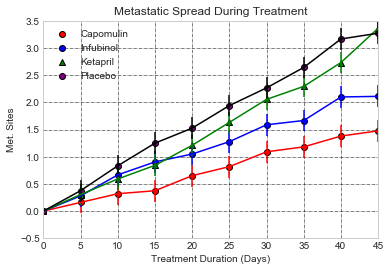

In [468]:
# Part 2 - Create the Scatter Plot for Metastatic Sites
# Tell matplotlib to create a scatter plot based upon the above data 
Capmoullin = plt.scatter(Metastatic_OverTime["Timepoint"], Metastatic_OverTime["Capomulin"], marker="o", facecolors="red", edgecolors="black", label="Capomulin")
Infubinol  = plt.scatter(Metastatic_OverTime["Timepoint"], Metastatic_OverTime["Infubinol"], marker="o", facecolors="blue", edgecolors="black", label="Infubinol")
Ketapril = plt.scatter(Metastatic_OverTime["Timepoint"], Metastatic_OverTime["Ketapril"], marker="^", facecolors="green", edgecolors="black", label="Ketapril")
Placebo = plt.scatter(Metastatic_OverTime["Timepoint"], Metastatic_OverTime["Placebo"], marker="o", facecolors="purple", edgecolors="black", label="Placebo")

# Create a title, x label, and y label for our chart
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

# example error bar values that vary with x-position
#error = 0.2 * TumorVol_OverTime["Timepoint"]


plt.errorbar(Metastatic_OverTime["Timepoint"], Metastatic_OverTime["Capomulin"], 0.2, color = "r")
plt.errorbar(Metastatic_OverTime["Timepoint"], Metastatic_OverTime["Infubinol"], 0.2, color = "b")
plt.errorbar(Metastatic_OverTime["Timepoint"], Metastatic_OverTime["Ketapril"], 0.2, color = "g")
plt.errorbar(Metastatic_OverTime["Timepoint"], Metastatic_OverTime["Placebo"], 0.2, color = "k")

#plt.show()

#ax.grid(color='r', linestyle='-', linewidth=2)
x_max_value = (Metastatic_OverTime["Timepoint"].max())

y_max_value = round(y_max_value)

y_min_value = round (y_min_value)

#print (str(x_max_value))

#print (str(y_max_value))

#print (str(y_min_value))

plt.xlim(0, x_max_value)

plt.ylim( y_min_value - 0.5 , y_max_value +  0.5 )

plt.legend(handles=[Capmoullin, Infubinol, Ketapril, Placebo], loc="best")
plt.grid(color = 'k', linestyle='-.', linewidth=0.5)

plt.show()



In [469]:
# Part 3: Now for building the data needs for scatter plot of Survival Rate over time 

# Take only columns we need from mouse_drug for lot on Tumer volume over Time plot 
#Mouse ID	Timepoint	Tumor Volume (mm3)
reduced_mouse_drug2 = clinical_mouse_drug_data.loc[:, ['Drug','Timepoint','Mouse ID']]

#reduced_mouse_drug2.head()

# Group By Drugs for Drug 1 Capmoulin and count number of mice 
clinical_ForCapmoulin = reduced_mouse_drug2[reduced_mouse_drug2['Drug'] == "Capomulin"].groupby('Timepoint')['Mouse ID'].count()

Capmoulin_pd = pd.DataFrame (clinical_ForCapmoulin)

Capmoulin_pd.reset_index(inplace = True)

Capmoulin_pd.rename(columns={"Mouse ID":"Capomulin"}, inplace = True)


#Need to calculate Survival Rate %
Total_MouseCount = 0

for index, row in Capmoulin_pd.iterrows():
    if (row["Timepoint"] == 0):
        Total_MouseCount = row["Capomulin"]
        break; 

#print (str(Total_MouseCount))

Capmoulin_pd["Capomulin Survival Rate %"] = Capmoulin_pd["Capomulin"] / Total_MouseCount * 100

Capmoulin_pd.head()

,Timepoint,Capomulin,Capomulin Survival Rate %
0,0,25,100.0
1,5,25,100.0
2,10,25,100.0
3,15,24,96.0
4,20,23,92.0


In [470]:
#Group By Drugs for Drug 2 Infubinol
clinical_ForInfubinol = reduced_mouse_drug2[reduced_mouse_drug2['Drug'] == "Infubinol"].groupby('Timepoint')['Mouse ID'].count()


Infubinol_pd = pd.DataFrame (clinical_ForInfubinol)

Infubinol_pd.reset_index(inplace = True)


Infubinol_pd.rename(columns={"Mouse ID":"Infubinol"}, inplace=True)

#Need to calculate Survival Rate %
Total_MouseCount = 0

for index, row in Infubinol_pd.iterrows():
    if (row["Timepoint"] == 0):
        Total_MouseCount = row["Infubinol"]
        break; 

print (str(Total_MouseCount))

Infubinol_pd["Infubinol Survival Rate %"] = Infubinol_pd["Infubinol"] / Total_MouseCount * 100

#Infubinol_pd.head()

25


In [471]:
# Group By Drugs for Drug 3 Ketapril
clinical_ForKetapril = reduced_mouse_drug2[reduced_mouse_drug2['Drug'] == "Ketapril"].groupby('Timepoint')['Mouse ID'].count()


Ketapril_pd = pd.DataFrame (clinical_ForKetapril)

Ketapril_pd.reset_index(inplace = True)
Ketapril_pd.head()

Ketapril_pd.rename(columns={"Mouse ID":"Ketapril"}, inplace=True)

#Need to calculate Survival Rate %
Total_MouseCount = 0

for index, row in Ketapril_pd.iterrows():
    if (row["Timepoint"] == 0):
        Total_MouseCount = row["Ketapril"]
        break; 

print (str(Total_MouseCount))

Ketapril_pd["Ketapril Survival Rate %"] = Ketapril_pd["Ketapril"] / Total_MouseCount * 100


#Ketapril_pd.head()



25


In [472]:
# Group By Drugs for drug 4 Placebo
clinical_ForPlacebo = reduced_mouse_drug2[reduced_mouse_drug2['Drug'] == "Placebo"].groupby('Timepoint')['Mouse ID'].count()


Placebo_pd = pd.DataFrame (clinical_ForPlacebo)

Placebo_pd.reset_index(inplace = True)
Placebo_pd.head()

Placebo_pd.rename(columns={"Mouse ID":"Placebo"}, inplace=True)

#Need to calculate Survival Rate %
Total_MouseCount = 0

for index, row in Placebo_pd.iterrows():
    if (row["Timepoint"] == 0):
        Total_MouseCount = row["Placebo"]
        break; 

#print (str(Total_MouseCount))

Placebo_pd["Placebo Survival Rate %"] = Placebo_pd["Placebo"] / Total_MouseCount * 100

#Placebo_pd.head()



In [473]:
#Merge the Different Drug Dataframes by their Timepoints and Get final dataframe needed to make a scatter plot of 
# Survival rate  over time 

merged_ForCapInf = pd.merge(Capmoulin_pd , Infubinol_pd, on="Timepoint")

#merged_ForCapInf.head()

merged_ForKetPla = pd.merge(Ketapril_pd , Placebo_pd, on="Timepoint")

#merged_ForKetPla.head()

SurvivalRate_OverTime = pd.merge(merged_ForCapInf, merged_ForKetPla, on="Timepoint")

SurvivalRate_OverTime.head(20)

,Timepoint,Capomulin,Capomulin Survival Rate %,Infubinol,Infubinol Survival Rate %,Ketapril,Ketapril Survival Rate %,Placebo,Placebo Survival Rate %
0,0,25,100.0,25,100.0,25,100.0,25,100.0
1,5,25,100.0,25,100.0,23,92.0,24,96.0
2,10,25,100.0,21,84.0,22,88.0,24,96.0
3,15,24,96.0,21,84.0,19,76.0,20,80.0
4,20,23,92.0,20,80.0,19,76.0,19,76.0
5,25,22,88.0,18,72.0,19,76.0,17,68.0
6,30,22,88.0,17,68.0,18,72.0,15,60.0
7,35,22,88.0,12,48.0,17,68.0,14,56.0
8,40,21,84.0,10,40.0,15,60.0,12,48.0
9,45,21,84.0,9,36.0,11,44.0,11,44.0


In [474]:
#Find ymax and ymin value 

SurvivalRate_ByDrug = pd.DataFrame(reduced_mouse_drug2.groupby(['Drug','Timepoint'])['Mouse ID'].count())

SurvivalRate_ByDrug.head(100)

y_max_value = SurvivalRate_OverTime["Capomulin Survival Rate %"].max()

#Assign the y-max value appropriately 
if (SurvivalRate_OverTime["Infubinol Survival Rate %"].max() > y_max_value):
    y_max_value = SurvivalRate_OverTime["Infubinol Survival Rate %"].max()

if (SurvivalRate_OverTime["Ketapril Survival Rate %"].max() > y_max_value):
     y_max_value = SurvivalRate_OverTime["Ketapril Survival Rate %"].max()

if (SurvivalRate_OverTime["Placebo Survival Rate %"].max() > y_max_value):
     y_max_value = SurvivalRate_OverTime["Placebo Survival Rate %"].max()

#Assign the y-min value appropritaley 
y_min_value = SurvivalRate_OverTime["Capomulin Survival Rate %"].min()

if (SurvivalRate_OverTime["Infubinol Survival Rate %"].min() < y_min_value):
    y_min_value = SurvivalRate_OverTime["Infubinol Survival Rate %"].min()

if (SurvivalRate_OverTime["Ketapril Survival Rate %"].min() < y_min_value):
     y_min_value = SurvivalRate_OverTime["Ketapril Survival Rate %"].min()

if (SurvivalRate_OverTime["Placebo Survival Rate %"].min() < y_min_value):
     y_min_value = SurvivalRate_OverTime["Placebo Survival Rate %"].min()

#print ("%s %s" % (str(y_max_value), str(y_min_value)))

#print ("%s" % (str(x_max_value)))

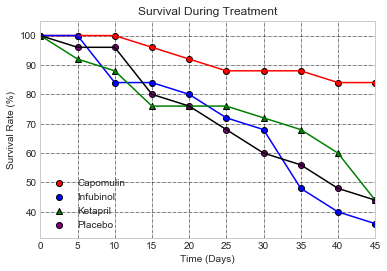

In [475]:
# Part 3 - Create the Scatter Plot for Survival Rate 
# Tell matplotlib to create a scatter plot based upon the above data 
Capmoullin = plt.scatter(SurvivalRate_OverTime["Timepoint"], SurvivalRate_OverTime["Capomulin Survival Rate %"], marker="o", facecolors="red", edgecolors="black", label="Capomulin")
Infubinol  = plt.scatter(SurvivalRate_OverTime["Timepoint"], SurvivalRate_OverTime["Infubinol Survival Rate %"], marker="o", facecolors="blue", edgecolors="black", label="Infubinol")
Ketapril = plt.scatter(SurvivalRate_OverTime["Timepoint"], SurvivalRate_OverTime["Ketapril Survival Rate %"], marker="^", facecolors="green", edgecolors="black", label="Ketapril")
Placebo = plt.scatter(SurvivalRate_OverTime["Timepoint"], SurvivalRate_OverTime["Placebo Survival Rate %"], marker="o", facecolors="purple", edgecolors="black", label="Placebo")

# Create a title, x label, and y label for our chart
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

# example error bar values that vary with x-position
#error = 0.2 * TumorVol_OverTime["Timepoint"]


plt.errorbar(SurvivalRate_OverTime["Timepoint"], SurvivalRate_OverTime["Capomulin Survival Rate %"], 0.2, color = "r")
plt.errorbar(SurvivalRate_OverTime["Timepoint"], SurvivalRate_OverTime["Infubinol Survival Rate %"], 0.2, color = "b")
plt.errorbar(SurvivalRate_OverTime["Timepoint"], SurvivalRate_OverTime["Ketapril Survival Rate %"], 0.2, color = "g")
plt.errorbar(SurvivalRate_OverTime["Timepoint"], SurvivalRate_OverTime["Placebo Survival Rate %"], 0.2, color = "k")

#plt.show()

#ax.grid(color='r', linestyle='-', linewidth=2)
x_max_value = (SurvivalRate_OverTime["Timepoint"].max())

y_max_value = round(y_max_value)

y_min_value = round (y_min_value)

#print (str(x_max_value))

#print (str(y_max_value))

#print (str(y_min_value))

plt.xlim(0, x_max_value)

plt.ylim( y_min_value - 5 , y_max_value +  5 )

plt.legend(handles=[Capmoullin, Infubinol, Ketapril, Placebo], loc="best")
plt.grid(color = 'k', linestyle='-.', linewidth=0.5)

plt.show()





In [476]:
# Part 4 - Bar plot showing the % Tumor Volume growth or reduction in Bar plots 

#To do this - Pull up the data we have calculated to show this Bar plot so far 

Tumor_Percent_Change_ByDrug.head()

Tumor_Percent_Change_ByDrug["Color"] = ""
green_color = 'g'
red_color = 'r'

for index, row in Tumor_Percent_Change_ByDrug.iterrows():
    # If the Tumor size has decreased, this is a positive and it would need reflected as green in bar plot else red
    if (row["% Tumor Volume Change"] <= 0):
        Tumor_Percent_Change_ByDrug.set_value(index, "Color", green_color)
    else:
        Tumor_Percent_Change_ByDrug.set_value(index, "Color", red_color)

Tumor_Percent_Change_ByDrug.head()

,Drug Name,Original Volume,Volume Change,% Tumor Volume Change,Color
0,Capomulin,45,-8.76389,-19.4753,g
1,Infubinol,45,20.7556,46.1235,r
2,Ketapril,45,25.663,57.0288,r
3,Placebo,45,23.0841,51.298,r


In [477]:
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    #half_y_height = round(y_height/2)
    
    for rect in rects:
        height = rect.get_height()
        
        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)
        
        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        #if height < 0 and goes dowm,we need to write it below 0versus above 0
        if height < 0: # arbitrary; 95% looked good to me.
            label_position = ((rect.get_x() + rect.get_width()/2.) - 8)
        else:
            label_position = ((rect.get_x() + rect.get_width()/2.) + 2)
        
        ax.text(rect.get_x() + rect.get_width()/2., label_position, '%d%%' % int(height), ha='center', va='bottom')



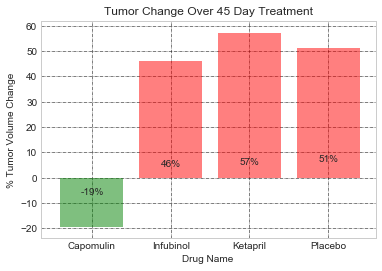

In [478]:
# Create a title, x label, and y label for our chart
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drug Name")
plt.ylabel("% Tumor Volume Change")

x_axis = np.arange(len(Tumor_Percent_Change_ByDrug["Drug Name"]))

#print (x_axis)

#fig, ax = plt.subplots()
rect1 = plt.bar(x_axis, Tumor_Percent_Change_ByDrug["% Tumor Volume Change"], color= Tumor_Percent_Change_ByDrug["Color"], alpha=0.5, align="edge")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, Tumor_Percent_Change_ByDrug["Drug Name"])

# Count Plot (a.k.a. Bar Plot)
#sns.countplot(x='Drug Name', data=Tumor_Percent_Change_ByDrug["% Tumor Volume Change"])
 
# Rotate x-labels
#plt.xticks(rotation=-45)


y_max_value = round(Tumor_Percent_Change_ByDrug["% Tumor Volume Change"].max())

y_min_value = round (Tumor_Percent_Change_ByDrug["% Tumor Volume Change"].min())

#print ("X Max: %s Y Max: %s Y Min: %s" %(str(len(x_axis)), str(y_max_value), str(y_min_value)))

plt.xlim(-0.25, len(x_axis))

plt.ylim( y_min_value - 5 , y_max_value +  5 )


plt.grid(color = 'k', linestyle='-.', linewidth=0.5)



autolabel(rect1, plt.gca())

plt.show()